In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
%matplotlib inline
#%load_ext autoreload
#%autoreload 2
import tensorflow as tf
from tensorflow import keras

import DataGenerator as DG
from DataGenerator import DataGenerator

from tensorflow.keras import layers

#Progress bar fix: use callbacks=[Logger.JupyterProgbarLogger()] in fit method
#verbose=0 is also required
import JupyterProgbarLogger as Logger
from tqdm import tqdm_notebook as tqdm
#from kerastuner.tuners import RandomSearch


import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split as train_test_split
import numpy as np
import random
import math

from datetime import datetime
import os
import glob
from shutil import copy
from functools import partial

import matplotlib.pyplot as plt

import h5py

import multiprocessing as mp

mp.set_start_method("spawn",force=True)
os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"
###FIX NUMPY LOAD FOR DICTIONARIES
np_load_old = np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

###Tensorflow session
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=config))

In [2]:
#Data file
filepath = "images_synthetic_mouse_uncompressed.h5"
#If you want to copy the file to a scratch directory
scratch_dir = "/mnt/disks/sec/Amit/"
#Copy file to scratch directory if it is specified, and change filepath to match.
if not os.path.exists((scratch_dir+filepath)):
    copy(filepath,scratch_dir)
    print("File Copied to scratch directory")
filepath=scratch_dir+filepath
print("Using path: ",filepath)

Using path:  /mnt/disks/sec/Amit/images_synthetic_mouse_uncompressed.h5


In [16]:
def build_model(input_shape):
    inputs = layers.Input(shape=input_shape)
    fc1 = layers.Dense(512)(inputs)
    fc2 = layers.Dense(512)(fc1)
    fc3 = layers.Dense(512)(fc2)
    fc4 = layers.Dense(512)(fc3)
    concat = layers.Concatenate()([fc1,fc4])
    outputs = layers.Dense(60)(concat)
    outputs = layers.Activation('softmax')(outputs)
    model = keras.Model(inputs,outputs)
    model.compile(
        optimizer=keras.optimizers.SGD(
            learning_rate=1e-4,
            momentum=.9,
            nesterov=True,
            decay=1e-6
        ),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

In [17]:
data_locs = glob.glob('ensemble_predics/predic*')
data = np.zeros((len(data_locs),)+np.load(data_locs[0]).shape)
for i in range(0,len(data_locs)):
    data[i]=np.load(data_locs[i])
data = np.concatenate(data,axis=1)
labels = np.load('ensemble_predics/labels.npy')
#train_data,test_data,train_labels,test_labels = train_test_split(data,labels,shuffle=False)

In [20]:
model = build_model((300))
history = model.fit(data,labels, batch_size=8, epochs=100, verbose=1, validation_split=0.1)

Train on 6300 samples, validate on 700 samples
Epoch 1/100
6300/6300 [==============================] - 7s 1ms/sample - loss: 3.9048 - accuracy: 0.2813 - val_loss: 3.7821 - val_accuracy: 0.3800
Epoch 2/100
6300/6300 [==============================] - 7s 1ms/sample - loss: 3.5640 - accuracy: 0.4775 - val_loss: 3.4855 - val_accuracy: 0.3871
Epoch 3/100
6300/6300 [==============================] - 6s 984us/sample - loss: 3.2031 - accuracy: 0.4703 - val_loss: 3.1876 - val_accuracy: 0.3871
Epoch 4/100
6300/6300 [==============================] - 6s 1ms/sample - loss: 2.8597 - accuracy: 0.4941 - val_loss: 2.9131 - val_accuracy: 0.4314
Epoch 5/100
6300/6300 [==============================] - 7s 1ms/sample - loss: 2.5566 - accuracy: 0.5435 - val_loss: 2.6616 - val_accuracy: 0.4600
Epoch 6/100
6300/6300 [==============================] - 7s 1ms/sample - loss: 2.2941 - accuracy: 0.5635 - val_loss: 2.4405 - val_accuracy: 0.4743
Epoch 7/100
6300/6300 [==============================] - 7s 1ms/sampl

Epoch 56/100
6300/6300 [==============================] - 6s 947us/sample - loss: 1.1257 - accuracy: 0.6646 - val_loss: 1.3688 - val_accuracy: 0.6200
Epoch 57/100
6300/6300 [==============================] - 7s 1ms/sample - loss: 1.1233 - accuracy: 0.6627 - val_loss: 1.3828 - val_accuracy: 0.6086
Epoch 58/100
6300/6300 [==============================] - 6s 976us/sample - loss: 1.1230 - accuracy: 0.6638 - val_loss: 1.3737 - val_accuracy: 0.6171
Epoch 59/100
6300/6300 [==============================] - 6s 942us/sample - loss: 1.1218 - accuracy: 0.6644 - val_loss: 1.3738 - val_accuracy: 0.6157
Epoch 60/100
6300/6300 [==============================] - 6s 1ms/sample - loss: 1.1200 - accuracy: 0.6630 - val_loss: 1.3685 - val_accuracy: 0.6200
Epoch 61/100
6300/6300 [==============================] - 6s 1ms/sample - loss: 1.1187 - accuracy: 0.6643 - val_loss: 1.3689 - val_accuracy: 0.6171
Epoch 62/100
6300/6300 [==============================] - 6s 966us/sample - loss: 1.1182 - accuracy: 0.665

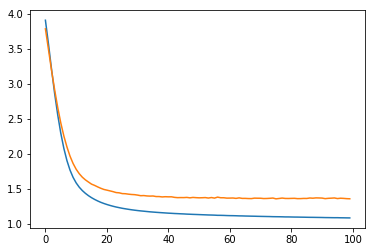

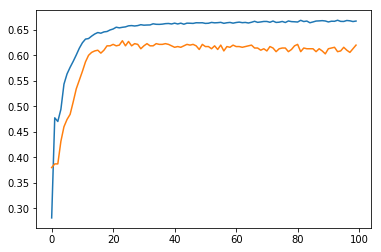

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()